(-0.7510839447829725,
 1.166392592038201,
 -0.7006007316689754,
 0.6329973065089726)

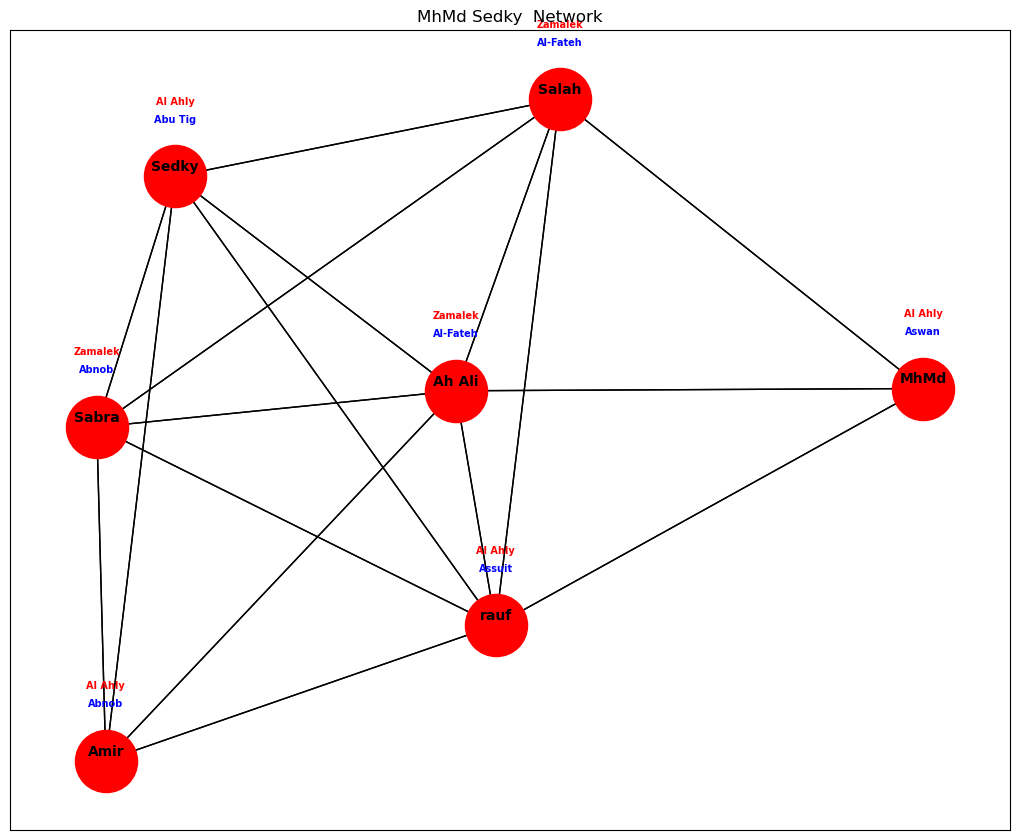

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

N = nx.Graph()

N.add_edges_from([('Sedky', 'Sabra'), ('Sedky', 'rauf'), ('Sedky', 'Amir'), ('Sedky', 'Ah Ali'), ('Sedky', 'Salah'), ('Sabra', 'rauf'), ('Sabra', 'Amir'), ('Sabra', 'Ah Ali'), ('Sabra', 'Salah'), ('rauf', 'Amir'), ('rauf', 'Ah Ali'), ('rauf', 'Salah'), ('rauf', 'MhMd'), ('Amir', 'Ah Ali'), ('Ah Ali', 'Salah'), ('Ah Ali', 'MhMd'), ('Salah', 'MhMd')])

attributes = {
    'Sedky': {'city':'Abu Tig' , 'team':'Al Ahly'},
    'Sabra': {'city':'Abnob' , 'team':'Zamalek'},
    'rauf': {'city':'Assuit' , 'team':'Al Ahly'},
    'Amir': {'city':'Abnob' ,'team':'Al Ahly' },
    'Ah Ali': {'city':'Al-Fateh', 'team':'Zamalek'},
    'Salah': {'city':'Al-Fateh' , 'team':'Zamalek'},
    'MhMd': {'city':'Aswan' , 'team':'Al Ahly'}
}

nx.set_node_attributes(N, attributes)

plt.figure(figsize=(10, 8))

layout = nx.spring_layout(N)

nx.draw(N, layout, node_color='red', node_size=2000)

nx.draw_networkx_edges(N, layout, edge_color='black')

# Draw node labels (cities and teams) above nodes
for node, (x, y) in layout.items():
    plt.text(x, y + 0.009, node, horizontalalignment='center', fontsize=10, fontweight='bold',color='black')
    plt.text(x, y + 0.09, attributes[node]['city'], horizontalalignment='center', fontsize=7, fontweight='bold',color='blue')
    plt.text(x, y + 0.12, attributes[node]['team'], horizontalalignment='center', fontsize=7, fontweight='bold',color='red')

# Set plot title
plt.title("MhMd Sedky  Network")

# Turn on axis
plt.axis('on')

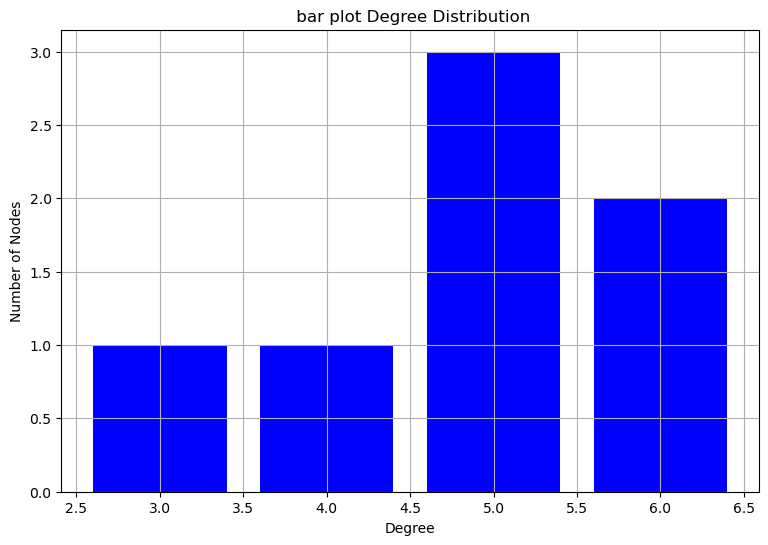

In [2]:
degrees_final= [N.degree(node) for node in N.nodes()]

# Count the number of nodesthat have each degree
degree_counts_final = {}
for degree in degrees_final:
    if degree in degree_counts_final:
        degree_counts_final[degree] += 1
    else:
        degree_counts_final[degree] = 1

# Plot the distribution 
plt.figure(figsize=(9, 6))
plt.bar(degree_counts_final.keys(), degree_counts_final.values(), color='blue')
plt.title(' bar plot Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()

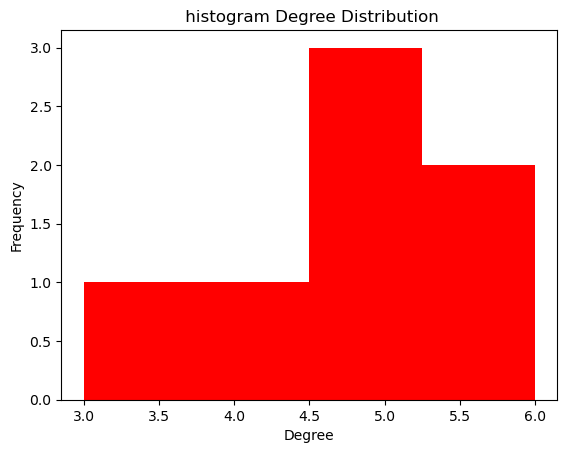

In [3]:
degrees = [N.degree(node) for node in N.nodes()]

plt.hist(degrees, bins='auto',color='red')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title(' histogram Degree Distribution')
plt.show()

C:\Users\Abdullah Salah\AppData\Local\Temp\ipykernel_17808\1640991235.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, poisson_probs, 'r', marker='o', linestyle='-', color='red',label='Poisson Distribution')


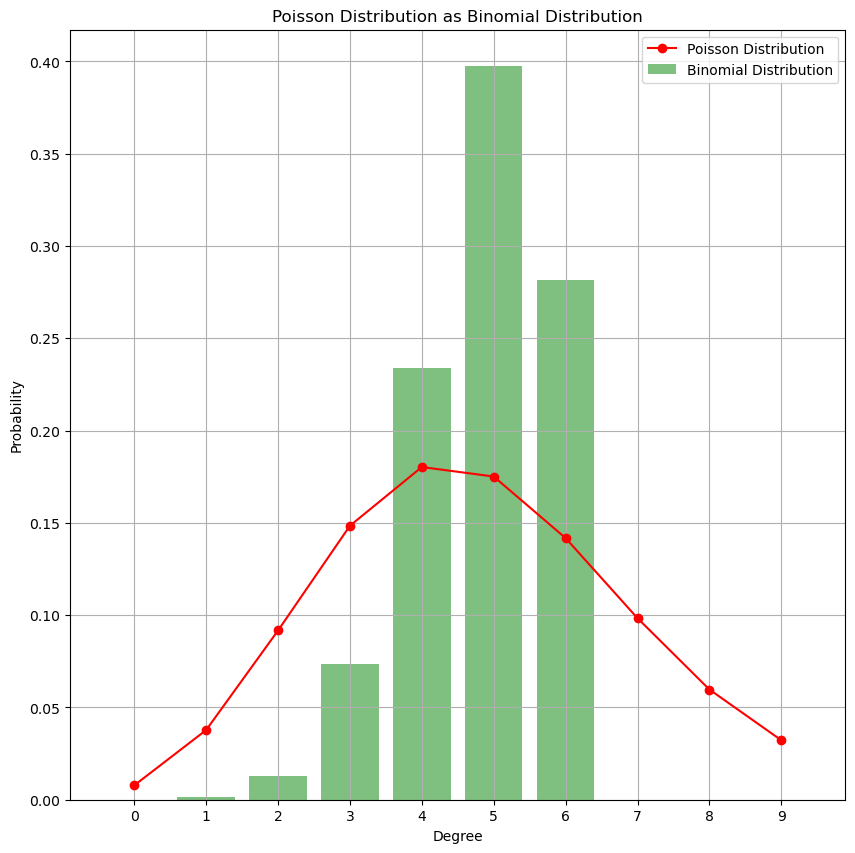

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, poisson
# Calculate the degree of each node
node_degrees = [N.degree(node) for node in N.nodes()]

# Count the number of nodes that have each degree
degree_counts = {}
for degree in node_degrees:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

# Calculate the average degree
average_degree = sum(degree * count for degree, count in degree_counts.items()) / len(N.nodes())

# Parameters for the Binomial distribution
n = max(degree_counts.keys())  # Maximum degree
p = average_degree / n  # Probability of success

# Generate a range of values for the x-axis
x = np.arange(0, n+4)

# Calculate the corresponding probabilities for each value of x using the Binomial distribution
binomial_probs = binom.pmf(x, n, p)

# Parameters for the Poisson distribution
lambda_param = average_degree  # Expected number of successes

# Calculate the corresponding probabilities for each value of x using the Poisson distribution
poisson_probs = poisson.pmf(x, lambda_param)

# Plotting
plt.figure(figsize=(10, 10))

# Plot the Binomial distribution
plt.bar(x, binomial_probs, alpha=0.5, color='green',label='Binomial Distribution')

# Plot the Poisson distribution
plt.plot(x, poisson_probs, 'r', marker='o', linestyle='-', color='red',label='Poisson Distribution')

# Set the labels and title
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Poisson Distribution as Binomial Distribution')
plt.xticks(x)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

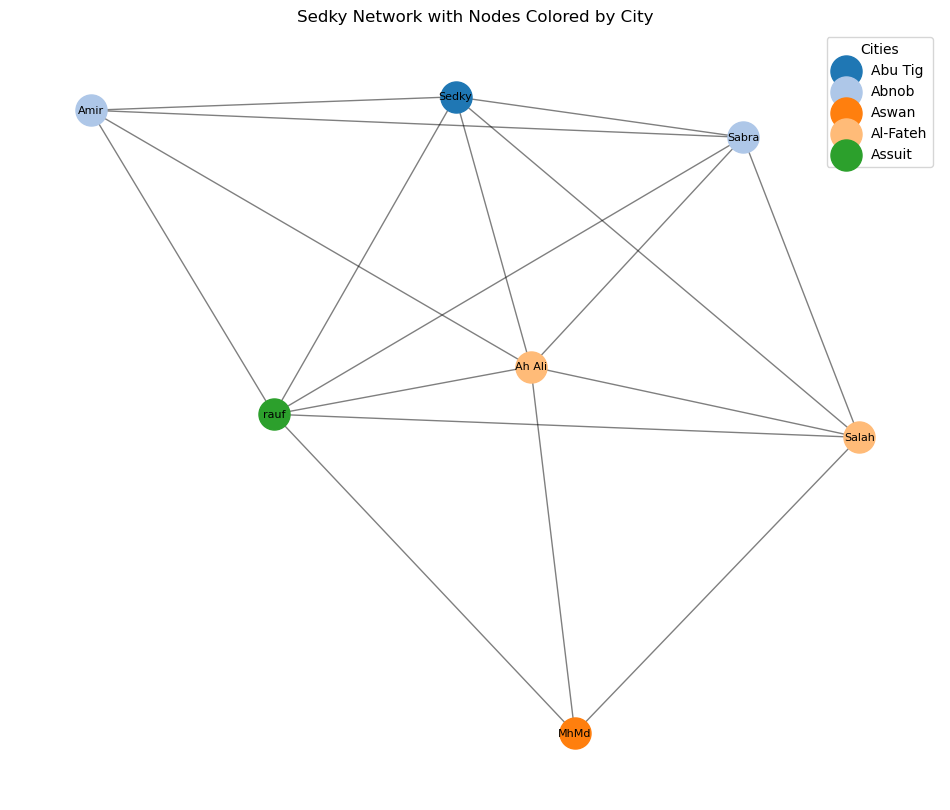

In [7]:
# Partition the nodes based on city attribute
partition = {node: data["city"] for node, data in N.nodes(data=True)}

# Choose a different color for each city
colors_tab20 = plt.cm.tab20.colors  # 20 distinct colors
colors_tab10 = plt.cm.tab10.colors  # 10 distinct colors
colors = colors_tab20 + colors_tab10  # Combine both to get more than 20 colors


# Draw the graph with nodes colored by city
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(N, seed=42)  # Define the layout of the graph
for city, color in zip(set(partition.values()), colors):
    node_list = [node for node, data in partition.items() if data == city]
    nx.draw_networkx_nodes(N, pos, nodelist=node_list, node_color=color, label=city,node_size=500)

nx.draw_networkx_edges(N, pos, alpha=0.5)
nx.draw_networkx_labels(N, pos, font_size=8)
plt.title("Sedky Network with Nodes Colored by City")
plt.legend(title="Cities")
plt.axis('off')
plt.show()